#Perkenalan
#Nama : Darmawan Wijaya
#Batch: 002
#Gambaran Umum Database: Data berisi list pokemon dengan nomor ID, nama pokemon, tipe pokemon dan status basic pokemon
#Objective yang ingin dicapai:  1. Menampilkan 5 pokemon non legendary dengan total status tertinggi dan 5 pokemon non legendary dengan total status terendah
                                2. Melakukan plotting data pokemon non legendary berdasarkan tipenya untuk melihat sebaran jumlah pokemon dan rata-rata nilai pada masing-masing status

In [17]:
#Library yang digunakan dalam tugas ini adalah Numpy, Pandas dan Matplolib

import numpy as np                  #Digunakan untuk proses import library numpy
import pandas as pd                 #Digunakan untuk proses import library pandas
import matplotlib.pyplot as plt     #Digunakan untuk proses import library matplotlib
#Diatas merupakan proses import dari library yang digunakan

In [18]:
#Data Loading
df=pd.read_csv('https://raw.githubusercontent.com/DarmawanW/h8dsft_P0W1/main/Pokemon.csv') #Untuk loading data pokemon
df.head() #Untuk memunculkan 5 baris teratas dari data yang dimaksud


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [19]:
#Eksplorasi Data - 1
df.info() #Melihat masing-masing jumlah data pada masing-masing kolom beserta tipe datanya


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [20]:
#Eksplorasi data - 2
df.describe()       #Digunakan untuk melihat detail statistik dasar dari data yang sudah diupload

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [21]:
#Cleaning Data-1
#Missing Values
#Dari data diatas didapatkan bahwa untuk kolom "Type 2" hanya terdapat 414 data 
#Dikarenakan kolom "Type 2" tidak berhubungan langsung dengan objective dari tugas ini, maka untuk kolom tersebut akan di drop
pokemon = df.copy()                         #Digunakan untuk melakukan copy dari data yang sudah diupload
pokemon_cleaned = pokemon.dropna(axis=1)    #Digunakan untuk melakukan drop dari kolom yang memiliki missing values
pokemon_cleaned.info()                      #Digunakan untuk melakukan pengecekan dari data yang sudah di cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 69.7+ KB


In [22]:
#Cleaning Data-2
#Untuk pokemon dengan kategory legendary tidak akan digunakan, sehingga untuk pokemon legendary tersebut akan dikeluarkan dari data
pokemon_non_legendary = pokemon_cleaned[pokemon_cleaned["Legendary"]==False]    #Digunakan untuk mengeluarkan pokemon legendary dari data
pokemon_non_legendary.info()                                                    #Digunakan untuk melakukan pengecekan dari data pokemon non legendary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 791
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           735 non-null    int64 
 1   Name        735 non-null    object
 2   Type 1      735 non-null    object
 3   Total       735 non-null    int64 
 4   HP          735 non-null    int64 
 5   Attack      735 non-null    int64 
 6   Defense     735 non-null    int64 
 7   Sp. Atk     735 non-null    int64 
 8   Sp. Def     735 non-null    int64 
 9   Speed       735 non-null    int64 
 10  Generation  735 non-null    int64 
 11  Legendary   735 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 69.6+ KB


In [23]:
#Objective 1-1
#Memunculkan 10 pokemon non legendary dengan total status tertinggi
pokemon_non_legendary.sort_values("Total",ascending=False).head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
413,376,MetagrossMega Metagross,Steel,700,80,145,150,105,110,110,3,False
494,445,GarchompMega Garchomp,Dragon,700,108,170,115,120,95,92,4,False
409,373,SalamenceMega Salamence,Dragon,700,95,145,130,120,90,120,3,False
268,248,TyranitarMega Tyranitar,Rock,700,100,164,150,95,120,71,2,False
313,289,Slaking,Normal,670,150,160,100,95,65,100,3,False


In [24]:
#Objective 1-2
#Memunculkan 10 pokemon non legendary dengan total status terendah
pokemon_non_legendary.sort_values("Total",ascending=True).head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,180,30,30,30,30,30,30,2,False
322,298,Azurill,Normal,190,50,20,40,20,40,20,3,False
446,401,Kricketot,Bug,194,37,25,41,25,41,25,4,False
16,13,Weedle,Bug,195,40,35,30,20,20,50,1,False
13,10,Caterpie,Bug,195,45,30,35,20,20,45,1,False


<AxesSubplot:>

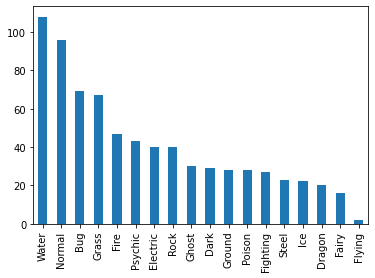

In [25]:
#Objective 2-1
#Melakukan plotting data untuk melihat sebaran pokemon berdasarkan type nya
pokemon_non_legendary["Type 1"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Type 1'>

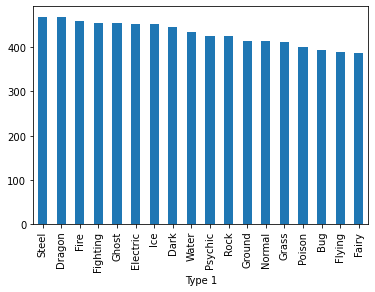

In [26]:
#Objective 2-2
#Melakukan plotting data untuk melihat nilai rata-rata total status pokemon berdasarkan type nya
pokemon_non_legendary.groupby("Type 1")["Total"].median().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='Type 1'>

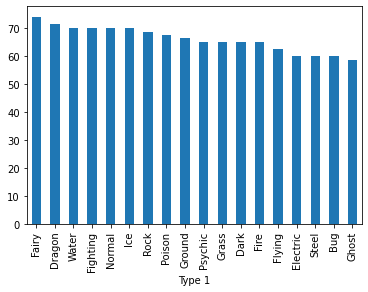

In [27]:
#Objective 2-3
#Melakukan plotting data untuk melihat nilai rata-rata status HP pokemon berdasarkan type nya
pokemon_non_legendary.groupby("Type 1")["HP"].median().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='Type 1'>

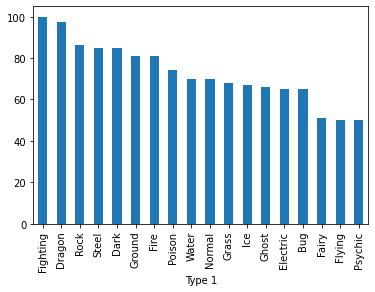

In [28]:
#Objective 2-4
#Melakukan plotting data untuk melihat nilai rata-rata status Attack pokemon berdasarkan type nya
pokemon_non_legendary.groupby("Type 1")["Attack"].median().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='Type 1'>

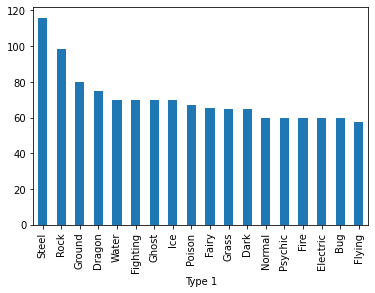

In [29]:
#Objective 2-5
#Melakukan plotting data untuk melihat nilai rata-rata status Defense pokemon berdasarkan type nya
pokemon_non_legendary.groupby("Type 1")["Defense"].median().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='Type 1'>

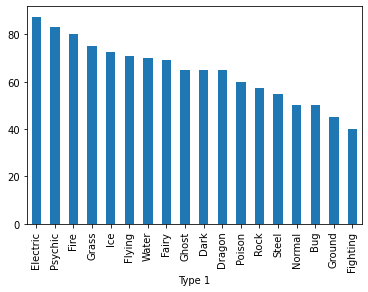

In [30]:
#Objective 2-6
#Melakukan plotting data untuk melihat nilai rata-rata status Special Attack pokemon berdasarkan type nya
pokemon_non_legendary.groupby("Type 1")["Sp. Atk"].median().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='Type 1'>

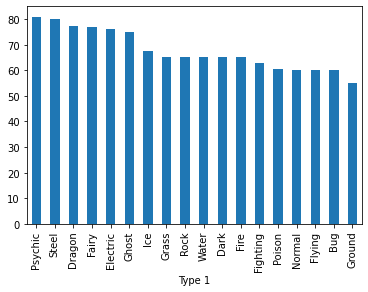

In [31]:
#Objective 2-7
#Melakukan plotting data untuk melihat nilai rata-rata status Special Defense pokemon berdasarkan type nya
pokemon_non_legendary.groupby("Type 1")["Sp. Def"].median().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='Type 1'>

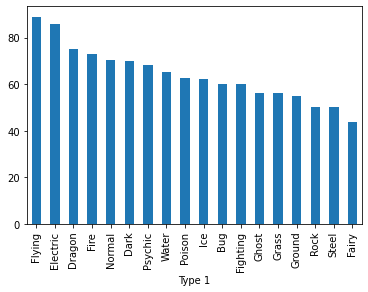

In [32]:
#Objective 2-8
#Melakukan plotting data untuk melihat nilai rata-rata status Speed pokemon berdasarkan type nya
pokemon_non_legendary.groupby("Type 1")["Speed"].median().sort_values(ascending=False).plot(kind="bar")

Kesimpulan
Berdasarkan hasil analisa diatas dapat diambil kesimpulan bahwa:
    1.  a. 5 Pokemon non legendary dengan total status tertinggi adalah: Mega Metagross, Mega Garchomp, Mega Salamence, Mega Tyranitar dan Slaking
        b. 5 Pokemon non legendary dengan total status terendah adalah: Sunkern, Azurill, Kricketot, Weedle, Caterpie
    2.  a. Tipe pokemon terbanyak adalah pokemon tipe Water, diikuti dengan pokemon tipe Normal dan pokemon tipe Bug.
        b. Pokemon dengan nilai rata-rata total status tertinggi adalah pokemon tipe Steel, diikuti dengan pokemon tipe Dragon dan pokemon tipe Fire
        c. Pokemon dengan nilai rata-rata status HP tertinggi adalah pokemon tipe Fairy, diikuti dengan pokemon tipe Dragon dan pokemon tipe Water
        d. Pokemon dengan nilai rata-rata status Attack tertinggi adalah pokemon tipe Fighting, diikuti dengan pokemon tipe Dragon dan pokemon tipe Rock
        e. Pokemon dengan nilai rata-rata status Defence tertinggi adalah pokemon tipe Steel, diikuti dengan pokemon tipe Rock dan pokemon tipe Ground
        f. Pokemon dengan nilai rata-rata status Sp. Atk tertinggi adalah pokemon tipe Electric, diikuti dengan pokemon tipe Psychic dan pokemon tipe Fire
        g. Pokemon dengan nilai rata-rata status Sp. Def tertinggi adalah pokemon tipe Psychic, diikuti dengan pokemon tipe Steel dan pokemon tipe Dragon
        h. Pokemon dengan nilai rata-rata status Speed tertinggi adalah pokemon tipe Flying, diikuti dengan pokemon tipe Electric dan pokemon tipe Dragon